<a href="https://colab.research.google.com/github/PersistingSoulV/COVID19-INDIA-Exploratory-Analysis/blob/main/CVOID19_Exploratory_Analysis_on_INDIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data exploration of COVID19 in INDIA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats
import matplotlib.pyplot as plt
import datetime as datetime
%matplotlib inline

In [3]:
dataset1 = pd.read_csv('/content/drive/MyDrive/MTech AI/COVID19 Data/covid_19_india.csv')
dataset2 = pd.read_csv('/content/drive/MyDrive/MTech AI/COVID19 Data/StatewiseTestingDetails.csv')
dataset3 = pd.read_csv('/content/drive/MyDrive/MTech AI/COVID19 Data/covid_vaccine_statewise.csv')
covid19_cases_India = pd.DataFrame(dataset1)
covid19_testing_India = pd.DataFrame(dataset2)
covid19_vaccination_India = pd.DataFrame(dataset3)

## Analysis on CVID19 Cases in INDIA

#### DataFrame.info(): 
#### Print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [4]:
covid19_cases_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14978 entries, 0 to 14977
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       14978 non-null  int64 
 1   Date                      14978 non-null  object
 2   Time                      14978 non-null  object
 3   State/UnionTerritory      14978 non-null  object
 4   ConfirmedIndianNational   14978 non-null  object
 5   ConfirmedForeignNational  14978 non-null  object
 6   Cured                     14978 non-null  int64 
 7   Deaths                    14978 non-null  int64 
 8   Confirmed                 14978 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.0+ MB


### Let's see the duration/period during which the data is collected

# **DataFrame.drop_duplicates()**
### DataFrame.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

### 1.subset: By default, if the rows have the same values in all the columns, they are considered duplicates. This parameter is used to specify the columns that only need to be considered for identifying duplicates.
### 2.keep: Determines which duplicates (if any) to keep. It takes inputs as, 
### first – Drop duplicates except for the first occurrence. This is the default behavior.
### last – Drop duplicates except for the last occurrence.
### False – Drop all duplicates.
### 3.inplace: It is used to specify whether to return a new DataFrame or update an existing one. It is a boolean flag with default False.
### 4.ignore_index: It is a boolean flag to indicate if row index should be reset after dropping duplicate rows. False: It keeps the original row index. True: It reset the index, and the resulting rows will be labeled 0, 1, …, n – 1.


In [5]:
def stylingSpecificCell(x,rowIDX,colIDX,colours):
  df_styler = pd.DataFrame('',index=x.index,columns=x.columns)
  for i in range(len(rowIDX)):
    color = 'background-color: {0}; color: white'.format(colours[i])
    df_styler.iloc[rowIDX[i],colIDX] = color
  return df_styler

In [ ]:
import datetime as datetime


covid19_cases_India['Date'] = covid19_cases_India['Date'].astype('datetime64[ns]')

covid19_cases_India['Earliest Date of Covid Case Detected'] = covid19_cases_India['Date'].groupby(by=covid19_cases_India['State/UnionTerritory']).transform('min')
covid19_cases_India['Latest Date of Covid Case Detected'] = covid19_cases_India['Date'].groupby(by=covid19_cases_India['State/UnionTerritory']).transform('max')
#print("--------- State/Union Territory wise information about Start and End date of case details collected ------------------")
unique_list = covid19_cases_India[['State/UnionTerritory','Earliest Date of Covid Case Detected','Latest Date of Covid Case Detected']]
unique_list = unique_list.drop_duplicates(ignore_index=True)
unique_list = unique_list.style.apply(stylingSpecificCell,rowIDX=[1,39],colIDX = 0,colours=['red','green'],axis=None)
unique_list

,State/UnionTerritory,Earliest Date of Covid Case Detected,Latest Date of Covid Case Detected
0,Kerala,2020-01-30 00:00:00,2021-05-16 00:00:00
1,Telengana,2020-03-02 00:00:00,2021-05-01 00:00:00
2,Delhi,2020-03-02 00:00:00,2021-05-16 00:00:00
3,Rajasthan,2020-03-03 00:00:00,2021-05-16 00:00:00
4,Uttar Pradesh,2020-03-04 00:00:00,2021-05-16 00:00:00
5,Haryana,2020-03-04 00:00:00,2021-05-16 00:00:00
6,Ladakh,2020-03-07 00:00:00,2021-05-16 00:00:00
7,Tamil Nadu,2020-03-07 00:00:00,2021-05-16 00:00:00
8,Karnataka,2020-03-09 00:00:00,2021-05-16 00:00:00
9,Maharashtra,2020-03-09 00:00:00,2021-05-16 00:00:00


### we can see from the above table that State 'Telangana' has two entires with names 'Telengana' and 'Telangana'.So, we need to append those entries with State name as 'Telengana' to the entries belonging to State 'Telangana'

In [ ]:
dataset1 = pd.read_csv('/content/drive/MyDrive/MTech AI/COVID19 Data/covid_19_india.csv')
covid19_cases_India = pd.DataFrame(dataset1)
covid19_cases_India['Date'] = covid19_cases_India['Date'].astype('datetime64[ns]')
covid19_cases_India['State/UnionTerritory'] = covid19_cases_India['State/UnionTerritory'].replace(['Telengana'],'Telangana')
covid19_cases_India['Earliest Date of Covid Case Detected'] = covid19_cases_India['Date'].groupby(by=covid19_cases_India['State/UnionTerritory']).transform('min')
covid19_cases_India['Latest Date of Covid Case Detected'] = covid19_cases_India['Date'].groupby(by=covid19_cases_India['State/UnionTerritory']).transform('max')
unique_list = covid19_cases_India[['State/UnionTerritory','Earliest Date of Covid Case Detected','Latest Date of Covid Case Detected']]
unique_list = unique_list.drop_duplicates(ignore_index=True)
earliestDate = unique_list[(unique_list['Earliest Date of Covid Case Detected'] == unique_list['Earliest Date of Covid Case Detected'].min())].index.tolist()
unique_list = unique_list.style.apply(stylingSpecificCell,rowIDX=earliestDate,colIDX=1,colours=['red'],axis=None)
unique_list

,State/UnionTerritory,Earliest Date of Covid Case Detected,Latest Date of Covid Case Detected
0,Kerala,2020-01-30 00:00:00,2021-05-16 00:00:00
1,Telangana,2020-03-02 00:00:00,2021-05-16 00:00:00
2,Delhi,2020-03-02 00:00:00,2021-05-16 00:00:00
3,Rajasthan,2020-03-03 00:00:00,2021-05-16 00:00:00
4,Uttar Pradesh,2020-03-04 00:00:00,2021-05-16 00:00:00
5,Haryana,2020-03-04 00:00:00,2021-05-16 00:00:00
6,Ladakh,2020-03-07 00:00:00,2021-05-16 00:00:00
7,Tamil Nadu,2020-03-07 00:00:00,2021-05-16 00:00:00
8,Karnataka,2020-03-09 00:00:00,2021-05-16 00:00:00
9,Maharashtra,2020-03-09 00:00:00,2021-05-16 00:00:00


### We can observe from the above table that Kerala is the first state to report Covid case in India and it was reported on Jan 30th,2020

### Let's check if there are days where reporting is not present in the data we have right now. Which helps us in extrapolating those missing days with cases and produce close to accurate analysis.

In [26]:
from matplotlib import pyplot as plt

states = dataset1['State/UnionTerritory'].unique()

df = dataset1.copy()
df['Date'] = df['Date'].astype('datetime64[ns]')
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year.astype('str')
df['Month_Year'] = df['Month'].str.cat(df['Year'],sep="")
df['Min Case in the month'] = df.groupby('Month_Year')['Confirmed'].transform('min')
df['Max Case in the month'] = df.groupby('Month_Year')['Confirmed'].transform('max')
df['Cases_PerMonth'] = df['Max Case in the month'] - df['Min Case in the month']
df2 = df[['State/UnionTerritory','Month_Year','Cases_PerMonth']]
df2 = df2.drop_duplicates(ignore_index=True)

# Timeline of spread of cases in INDIA over the period of time

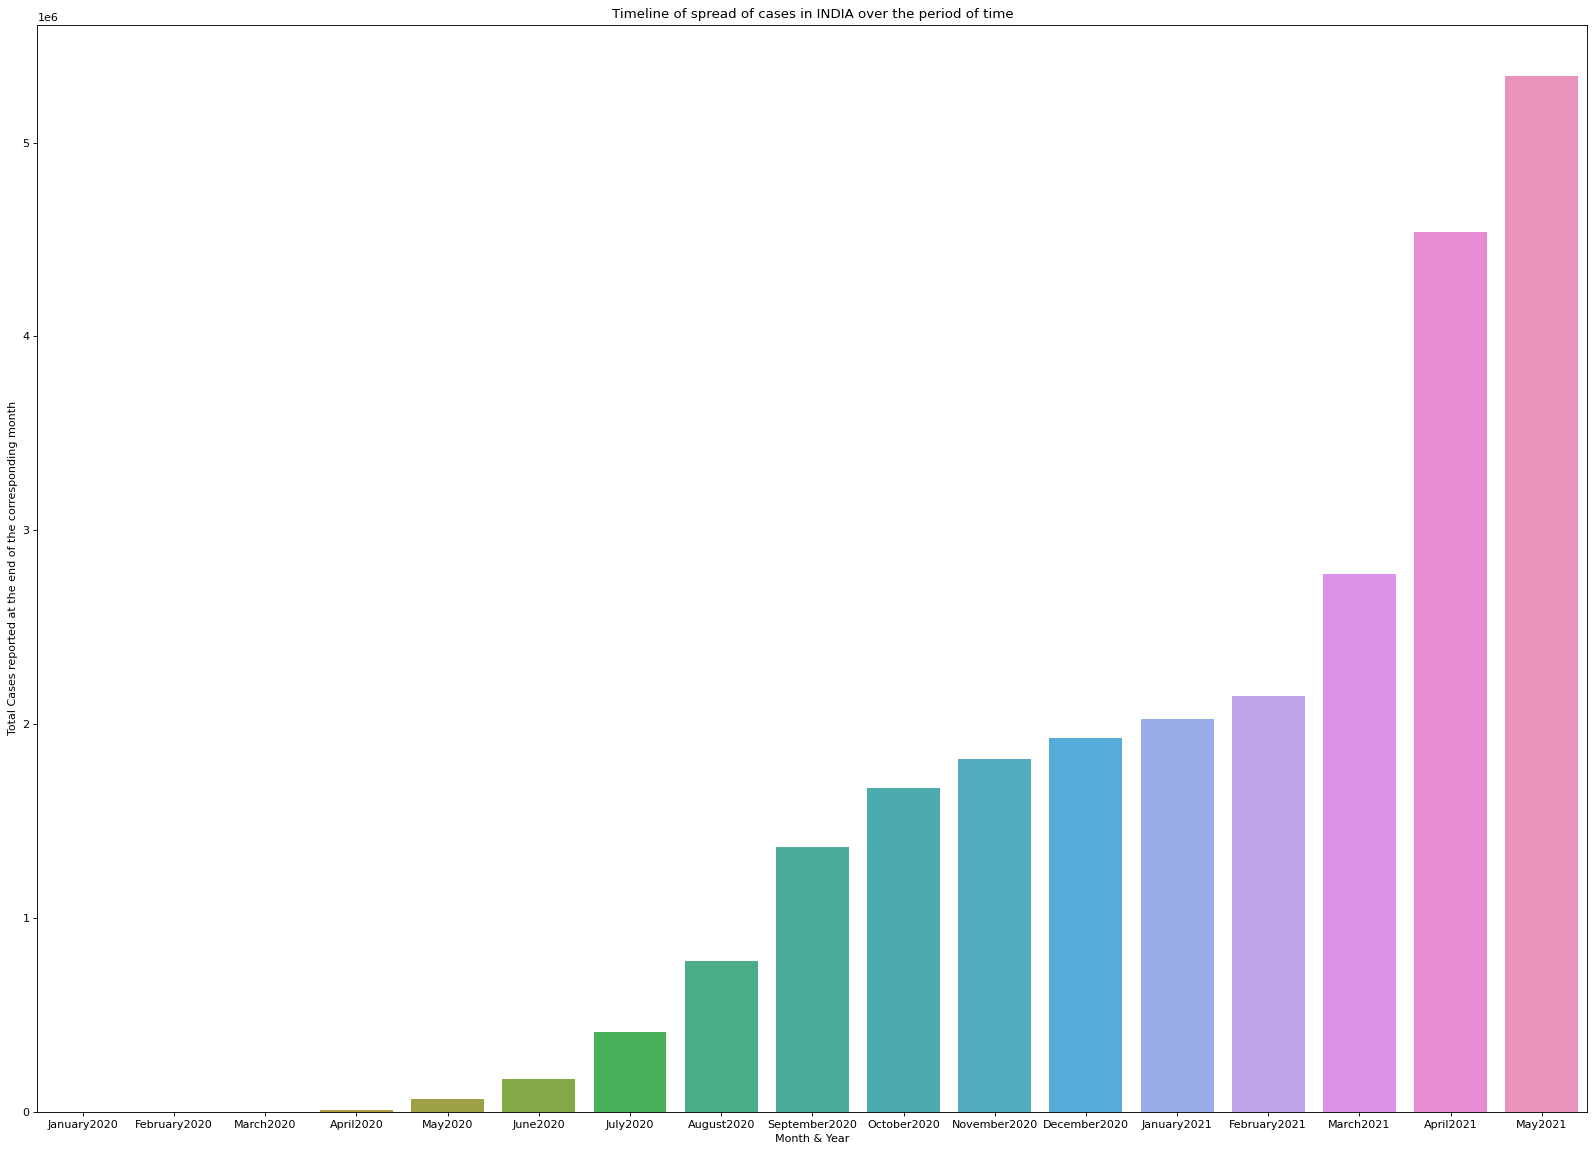

In [31]:
from matplotlib.pyplot import figure
import seaborn as sns
df_kerala = df2.copy()
df_kerala['State'] = df2[df2['State/UnionTerritory'] == 'Kerala']['State/UnionTerritory']
df_kerala['Month_Year'] = df2[df2['State/UnionTerritory'] == 'Kerala']['Month_Year']
df_kerala['Cases_PerMonth'] = df2[df2['State/UnionTerritory'] == 'Kerala']['Cases_PerMonth']
figure(num=None, figsize=(25,18), dpi=80, facecolor='w', edgecolor='r')
sns.barplot(x="Month_Year", y = "Cases_PerMonth" , data = df_kerala)
plt.title('Timeline of spread of cases in INDIA over the period of time')
plt.xlabel('Month & Year')
plt.ylabel('Total Cases reported at the end of the corresponding month')
plt.show()

# Check & Handling of null values

In [ ]:
#Checking for Null Values
print(covid19_cases_India.isnull().values.any())
print(covid19_testing_India.isnull().values.any())
print(covid19_vaccination_India.isnull().values.any())

False
True
True


In [ ]:
covid19_cases_India.loc[covid19_cases_India['State/UnionTerritory'] == 'Telengana','State/UnionTerritory'] = 'Telangana'

# General Info about the datasets

In [ ]:
distDS1 = []
cols = ['State','No of entries','Percentage of data out of whole dataset']
distDS1 = pd.DataFrame(distDS1,columns=cols)
states = np.unique(covid19_cases_India['State/UnionTerritory'])
for state in states:
  entry = [state]
  countrows = len(covid19_cases_India[covid19_cases_India['State/UnionTerritory'] == state])
  entry.append(countrows)
  entry.append(round((countrows/(len(covid19_cases_India))*100),2))
  distDS1.loc[len(distDS1)] = entry

distDS1

,State,No of entries,Percentage of data out of whole dataset
0,Andaman and Nicobar Islands,417,2.78
1,Andhra Pradesh,431,2.88
2,Arunachal Pradesh,409,2.73
3,Assam,411,2.74
4,Bihar,421,2.81
5,Cases being reassigned to states,60,0.40
6,Chandigarh,424,2.83
7,Chhattisgarh,424,2.83
8,Dadra and Nagar Haveli and Daman and Diu,376,2.51
9,Daman & Diu,1,0.01


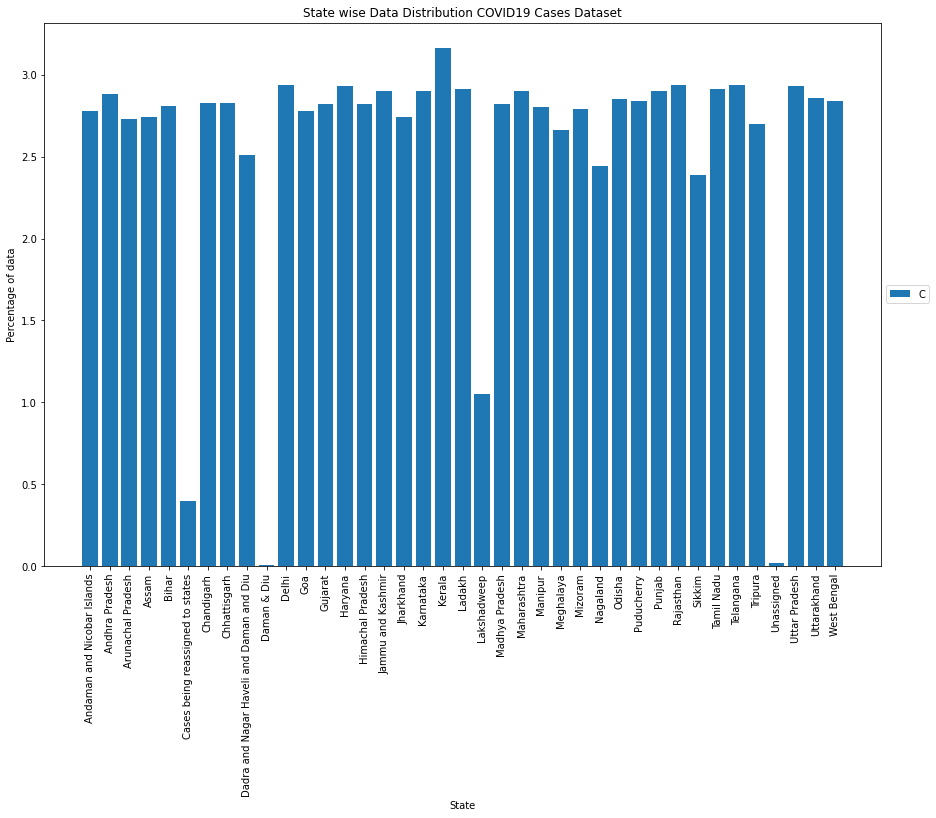

In [ ]:
plt.figure(figsize=(15, 10))
plt.bar(distDS1['State'],distDS1['Percentage of data out of whole dataset'])
plt.title('State wise Data Distribution COVID19 Cases Dataset')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Percentage of data')
plt.legend('Cases',loc='center left', bbox_to_anchor=(1, 0.5))
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.savefig('/content/drive/MyDrive/Intro to DS/ddDS1.png')

In [ ]:
distDS2 = []
cols = ['State','No of entries','Percentage of data out of whole dataset']
distDS2 = pd.DataFrame(distDS2,columns=cols)
states = np.unique(covid19_testing_India['State'])
for state in states:
  entry = [state]
  countrows = len(covid19_testing_India[covid19_testing_India['State'] == state])
  entry.append(countrows)
  entry.append(round((countrows/(len(covid19_testing_India))*100),2))
  distDS2.loc[len(distDS2)] = entry

distDS2

,State,No of entries,Percentage of data out of whole dataset
0,Andaman and Nicobar Islands,1,0.03
1,Andhra Pradesh,122,3.58
2,Arunachal Pradesh,116,3.40
3,Assam,48,1.41
4,Bihar,1,0.03
5,Chandigarh,127,3.73
6,Chhattisgarh,63,1.85
7,Dadra and Nagar Haveli and Daman and Diu,151,4.43
8,Delhi,22,0.65
9,Goa,2,0.06


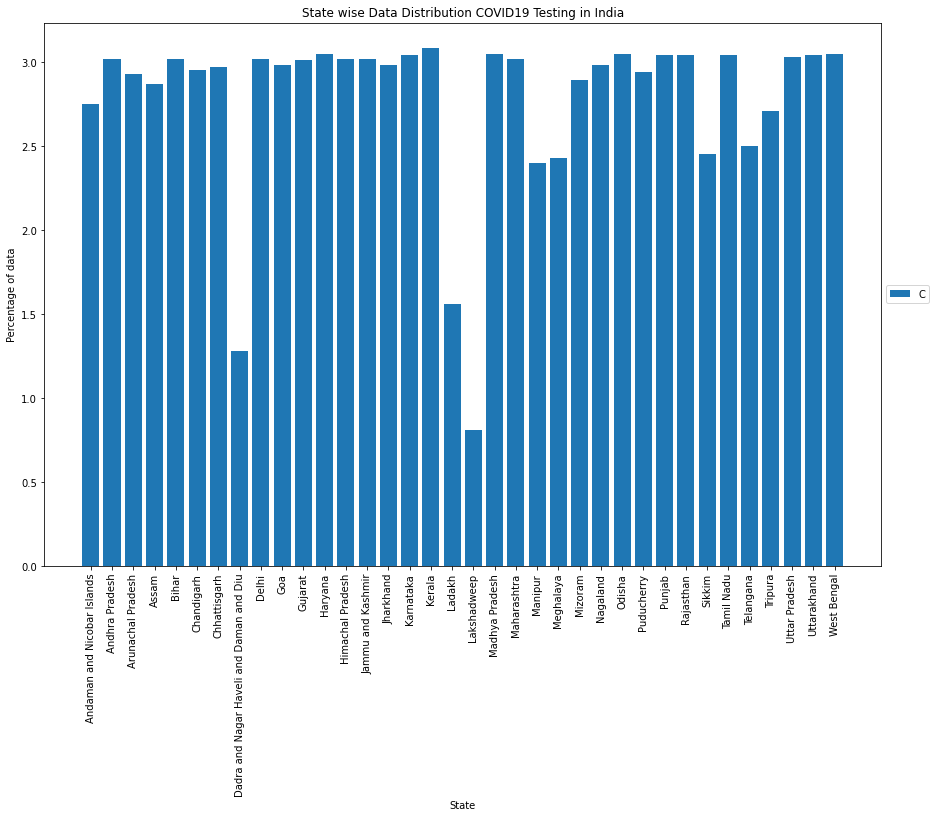

In [ ]:
plt.figure(figsize=(15, 10))
plt.bar(distDS2['State'],distDS2['Percentage of data out of whole dataset'])
plt.title('State wise Data Distribution COVID19 Testing in India')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Percentage of data')
plt.legend('Cases',loc='center left', bbox_to_anchor=(1, 0.5))
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.savefig('/content/drive/MyDrive/Intro to DS/ddDS2.png')

In [ ]:
distDS3 = []
cols = ['State','No of entries','Percentage of data out of whole dataset']
distDS3 = pd.DataFrame(distDS3,columns=cols)
states = np.unique(covid19_vaccination_India['State'])
for state in states:
  entry = [state]
  countrows = len(covid19_vaccination_India[covid19_vaccination_India['State'] == state])
  entry.append(countrows)
  entry.append(round((countrows/(len(covid19_vaccination_India))*100),4))
  distDS3.loc[len(distDS3)] = entry

distDS3

,State,No of entries,Percentage of data out of whole dataset
0,Andaman and Nicobar Islands,120,2.7027
1,Andhra Pradesh,120,2.7027
2,Arunachal Pradesh,120,2.7027
3,Assam,120,2.7027
4,Bihar,120,2.7027
5,Chandigarh,120,2.7027
6,Chhattisgarh,120,2.7027
7,Dadra and Nagar Haveli and Daman and Diu,120,2.7027
8,Delhi,120,2.7027
9,Goa,120,2.7027


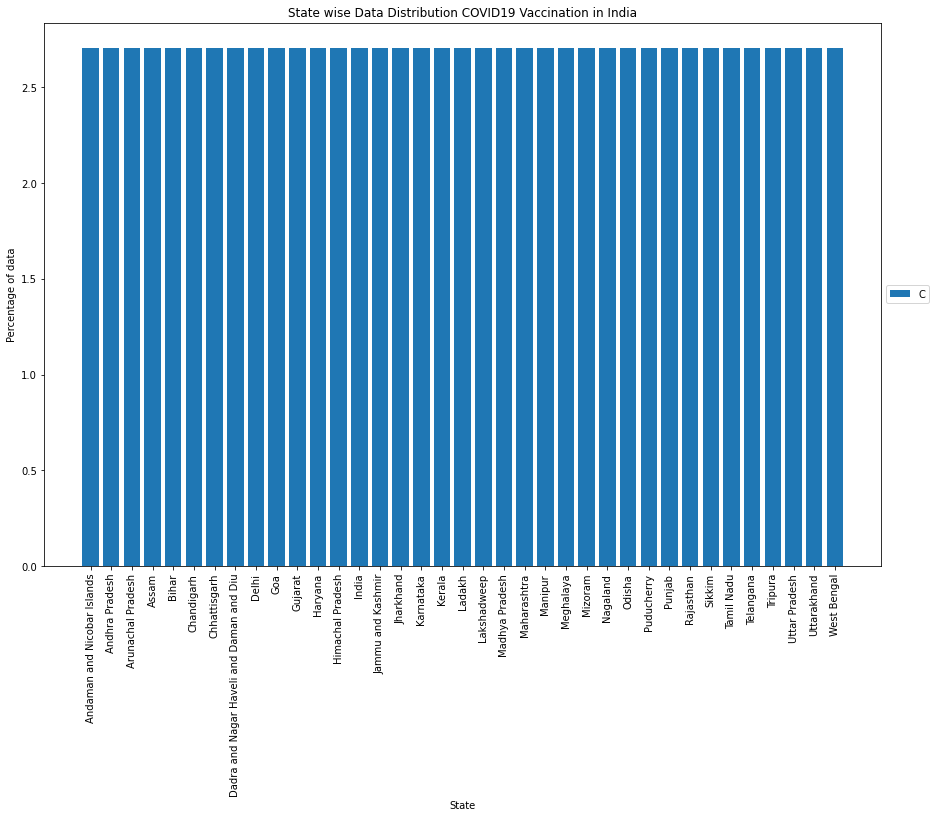

In [ ]:
plt.figure(figsize=(15, 10))
plt.bar(distDS3['State'],distDS3['Percentage of data out of whole dataset'])
plt.title('State wise Data Distribution COVID19 Vaccination in India')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Percentage of data')
plt.legend('Cases',loc='center left', bbox_to_anchor=(1, 0.5))
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.savefig('/content/drive/MyDrive/Intro to DS/ddDS3.png')

In [ ]:
states = np.unique(covid19_vaccination_India['State'])
states2 = np.unique(covid19_cases_India['State/UnionTerritory'])
len(states)

37

# Checking for 'null' values in the dataset

In [ ]:
print('covid19 cases dataset has any null values: ',covid19_cases_India.isnull().values.any())
covid19_cases_India[covid19_cases_India.isnull().any(axis=1)]

covid19 cases dataset has any null values:  False


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed


In [ ]:
print('covid19 testing dataset has any null values: ',covid19_testing_India.isnull().values.any())
covid19_testing_India[covid19_testing_India.isnull().any(axis=1)]

covid19 testing dataset has any null values:  True


,Date,State,TotalSamples,Negative,Positive
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
5,2020-05-19,Andaman and Nicobar Islands,6965.0,NaN,33.0
...,...,...,...,...,...
13295,2021-05-11,West Bengal,11099069.0,NaN,NaN
13296,2021-05-12,West Bengal,11168943.0,NaN,NaN
13297,2021-05-13,West Bengal,11239416.0,NaN,NaN
13298,2021-05-14,West Bengal,11309467.0,NaN,NaN


In [ ]:
print('Vaccination details dataset has any null values: ',covid19_vaccination_India.isnull().values.any())
covid19_vaccination_India[covid19_vaccination_India.isnull().any(axis=1)]

Vaccination details dataset has any null values:  True


,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,AEFI,18-30 years (Age),30-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,12/03/2021,West Bengal,1983003.0,612398.0,2987.0,1641083.0,341920.0,1195941.0,786842.0,220.0,201849.0,1781055.0,NaN,NaN,NaN,NaN,NaN,1983003.0
4376,13/03/2021,West Bengal,2104249.0,464570.0,2386.0,1742140.0,362109.0,1262535.0,841476.0,238.0,208534.0,1895615.0,NaN,NaN,NaN,NaN,NaN,2104249.0
4377,14/03/2021,West Bengal,2117985.0,180750.0,794.0,1753914.0,364071.0,1270369.0,847377.0,239.0,209422.0,1908463.0,NaN,NaN,NaN,NaN,NaN,2117985.0
4378,15/03/2021,West Bengal,2353011.0,713800.0,3610.0,1958513.0,394498.0,1397096.0,955639.0,276.0,221521.0,2131390.0,NaN,NaN,NaN,NaN,NaN,2353011.0


# Summary Statistics

## Central Tendency

### Mean

In [ ]:
states = np.unique(covid19_cases_India['State/UnionTerritory'])
covid19_cases_India['Cured'] = covid19_cases_India['Cured'].fillna(0)
covid19_cases_India['Deaths'] = covid19_cases_India['Deaths'].fillna(0)
covid19_cases_India['Confirmed'] = covid19_cases_India['Confirmed'].fillna(0)
covid19_cases_India['Deaths'] = covid19_cases_India['Deaths'].replace(' ',0)
covid19_cases_India['Deaths'] = pd.to_numeric(covid19_cases_India['Deaths'])
covid19_cases_India['Confirmed'] = covid19_cases_India['Confirmed'].replace(' ',0)
covid19_cases_India['Confirmed'] = pd.to_numeric(covid19_cases_India['Confirmed'])
statsSummary_ds1 = []
statsSummary_ds1 = pd.DataFrame(statsSummary_ds1,columns=['State','Mean Cured patients within the period','Mean deaths within the period','Mean Confirmed cases within the period'])
noOfDays = np.unique(covid19_cases_India['Date'])
for state in states:
  mean1ds1 = []
  mean2ds1 = []
  mean3ds1 = []
  mean1ds1 = np.array(mean1ds1)
  mean2ds1 = np.array(mean2ds1)
  mean3ds1 = np.array(mean3ds1)
  cured = covid19_cases_India[covid19_cases_India['State/UnionTerritory'] == state]['Cured']
  deaths = covid19_cases_India[covid19_cases_India['State/UnionTerritory'] == state]['Deaths']
  confirmed = covid19_cases_India[covid19_cases_India['State/UnionTerritory'] == state]['Confirmed']
  if (len(cured)-1) != 0:
    for i in range(len(cured)-1):
      mean1ds1 = np.append(mean1ds1,cured.iloc[i+1]-cured.iloc[i])
      mean2ds1 = np.append(mean2ds1,deaths.iloc[i+1]-deaths.iloc[i])
      mean3ds1 = np.append(mean3ds1,confirmed.iloc[i+1]-confirmed.iloc[i])
  else:
    mean1ds1 = cured
    mean2ds1 = deaths
    mean3ds1 = confirmed
  dupDates = covid19_cases_India[covid19_cases_India['State/UnionTerritory'] == state]['Date']
  ndays = np.unique(covid19_cases_India[covid19_cases_India['State/UnionTerritory'] == state]['Date'])
  mean_cured = math.ceil(pd.DataFrame(mean1ds1).mean())
  mean_deaths = math.ceil(pd.DataFrame(mean2ds1).mean())
  mean_confirmed = math.ceil(pd.DataFrame(mean3ds1).mean())
  df = pd.DataFrame({'State':[state],'Mean Cured patients within the period':[mean_cured],'Mean deaths within the period':[mean_deaths],'Mean Confirmed cases within the period':[mean_confirmed]})
  statsSummary_ds1 = statsSummary_ds1.append(df,ignore_index=True)

statsSummary_ds1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in ubyte_scalars


,State,Mean Cured patients within the period,Mean deaths within the period,Mean Confirmed cases within the period
0,Andaman and Nicobar Islands,16,1,17
1,Andhra Pradesh,2779,22,108
2,Arunachal Pradesh,48,1,48
3,Assam,677,6,92
4,Bihar,1331,9,109
5,Cases being reassigned to states,0,0,128
6,Chandigarh,110,2,65
7,Chhattisgarh,1858,28,100
8,Dadra and Nagar Haveli and Daman and Diu,23,1,24
9,Daman & Diu,0,0,2


In [ ]:
import weasyprint as wsp
import PIL as pil


def trim(source_filepath, target_filepath=None, background=None):
    if not target_filepath:
        target_filepath = source_filepath
    img = pil.Image.open(source_filepath)
    if background is None:
        background = img.getpixel((0, 0))
    border = pil.Image.new(img.mode, img.size, background)
    diff = pil.ImageChops.difference(img, border)
    bbox = diff.getbbox()
    img = img.crop(bbox) if bbox else img
    img.save(target_filepath)


img_filepath = '/content/drive/MyDrive/Intro to DS/ds1_ct.png'
css = wsp.CSS(string='''
@page { size: 2048px 2048px; padding: 0px; margin: 0px; }
table, td, tr, th { border: 1px solid black; }
td, th { padding: 4px 8px; }
''')
html = wsp.HTML(string=statsSummary_ds1.to_html())
html.write_png(img_filepath, stylesheets=[css])
trim(img_filepath)


In [ ]:
pip install weasyprint

     |████████████████████████████████| 368kB 2.9MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 71kB 6.2MB/s 
     |████████████████████████████████| 1.9MB 12.5MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.2.0-cp37-none-any.whl size=89548 sha256=9ff46097fc517823027af2c3a480ced3b4bc5742a9441f3451b4b2058176f182
  Stored in directory: /root/.cache/pip/wheels/40/76/48/f1effadceea83b32e7d957dd0f92db4db8b537d7b72b4ef374
Successfully built cairocffi


In [ ]:
covid19_testing_India['TotalSamples'] = covid19_testing_India['TotalSamples'].fillna(0)
covid19_testing_India['Positive'] = covid19_testing_India['Positive'].fillna(0)
covid19_testing_India['Negative'] = covid19_testing_India['Negative'].fillna(0)
covid19_testing_India['Negative'] = covid19_testing_India['Negative'].replace(' ',0)
covid19_testing_India['Negative'] = pd.to_numeric(covid19_testing_India['Negative'])
covid19_testing_India['Positive'] = covid19_testing_India['Positive'].replace(' ',0)
covid19_testing_India['Positive'] = pd.to_numeric(covid19_testing_India['Positive'])
states = np.unique(covid19_testing_India['State'])
statsSummary_ds2 = []
statsSummary_ds2 = pd.DataFrame(statsSummary_ds2,columns=['State','Mean Samples tested within the period','Mean Positive cases reported within the period','Mean Negative cases reported within the period'])
noOfDays = np.unique(covid19_testing_India['Date'])
counter = 0
for state in states:
  mode = []
  dupDates = covid19_testing_India[covid19_testing_India['State'] == state]['Date']
  startCured = covid19_testing_India[covid19_testing_India['State'] == state]['TotalSamples'].min()
  endCured = covid19_testing_India[covid19_testing_India['State'] == state]['TotalSamples'].max()
  startDeaths = covid19_testing_India[covid19_testing_India['State'] == state]['Negative'].min()
  endDeaths = covid19_testing_India[covid19_testing_India['State'] == state]['Negative'].max()
  startConfirmed = covid19_testing_India[covid19_testing_India['State'] == state]['Positive'].min()
  endConfirmed = covid19_testing_India[covid19_testing_India['State'] == state]['Positive'].max()
  ndays = np.unique(covid19_testing_India[covid19_testing_India['State'] == state]['Date'])
  mean_cured = math.ceil((endCured-startCured)/len(ndays))
  mean_deaths = math.ceil((endDeaths-startDeaths)/len(ndays))
  mean_confirmed = math.ceil((endConfirmed-startConfirmed)/len(ndays))
  df = pd.DataFrame({'State':[state],'Mean Samples tested within the period':[mean_cured],'Mean Positive cases reported within the period':[mean_deaths],'Mean Negative cases reported within the period':[mean_confirmed]})
  statsSummary_ds2 = statsSummary_ds2.append(df,ignore_index=True)

statsSummary_ds2

,State,Mean Samples tested within the period,Mean Positive cases reported within the period,Mean Negative cases reported within the period
0,Andaman and Nicobar Islands,1032,4,18
1,Andhra Pradesh,44586,41071,588
2,Arunachal Pradesh,1284,1197,7
3,Assam,24736,466,231
4,Bihar,69518,6,226
5,Chandigarh,1166,1024,6
6,Chhattisgarh,20553,336,50
7,Dadra and Nagar Haveli and Daman and Diu,426,405,19
8,Delhi,45334,100,378
9,Goa,1902,292,32


In [ ]:
import weasyprint as wsp
import PIL as pil


def trim(source_filepath, target_filepath=None, background=None):
    if not target_filepath:
        target_filepath = source_filepath
    img = pil.Image.open(source_filepath)
    if background is None:
        background = img.getpixel((0, 0))
    border = pil.Image.new(img.mode, img.size, background)
    diff = pil.ImageChops.difference(img, border)
    bbox = diff.getbbox()
    img = img.crop(bbox) if bbox else img
    img.save(target_filepath)


img_filepath = '/content/drive/MyDrive/Intro to DS/ds2_ct.png'
css = wsp.CSS(string='''
@page { size: 2048px 2048px; padding: 0px; margin: 0px; }
table, td, tr, th { border: 1px solid black; }
td, th { padding: 4px 8px; }
''')
html = wsp.HTML(string=statsSummary_ds2.to_html())
html.write_png(img_filepath, stylesheets=[css])
trim(img_filepath)


In [ ]:
covid19_vaccination_India = covid19_vaccination_India.fillna(0)
cols = covid19_vaccination_India.columns
states = np.unique(covid19_vaccination_India['State'])
statsSummary_ds3 = []
statsSummary_ds3 = pd.DataFrame(statsSummary_ds3,
columns=['State','Mean Total Individuals Vaccinated within the period',
'Mean Total Sessions Conducted within the period',
'Mean Total Sites established within the period',
'Mean First Dose Administered within the period',
'Mean Second Dose Administered  within the period',
'Mean Male(Individuals Vaccinated) within the period',
'Mean Female(Individuals Vaccinated) within the period',
'Mean Transgender(Individuals Vaccinated) within the period',
'Mean Total Covaxin Administered within the period',
'Mean Total CoviShield Administered within the period',
'Mean AEFI within the period',
'Mean 18-30 years (Age) within the period',
'Mean 30-45 years (Age) within the period',
'Mean 45-60 years (Age) within the period',
'Mean 60+ years (Age) within the period',
'Mean Total Doses Administered within the period'])
noOfDays = np.unique(covid19_vaccination_India['Updated On'])
counter = 0
for state in states:
  mode = []
  entry = [state]
  for col in cols:
    if(col != 'Updated On' and col != 'State'):
      dupDates = covid19_vaccination_India[covid19_vaccination_India['State'] == state]['Updated On']
      a = pd.to_numeric(covid19_vaccination_India[covid19_vaccination_India['State'] == state][col])
      b = pd.to_numeric(covid19_vaccination_India[covid19_vaccination_India['State'] == state][col])
      startVal = a.min()
      endVal = b.max()
      ndays = np.unique(dupDates)
      mean = math.ceil((endVal-startVal)/len(ndays))
      entry.append(mean)
  statsSummary_ds3.loc[len(statsSummary_ds3)] = entry

statsSummary_ds3

,State,Mean Total Individuals Vaccinated within the period,Mean Total Sessions Conducted within the period,Mean Total Sites established within the period,Mean First Dose Administered within the period,Mean Second Dose Administered within the period,Mean Male(Individuals Vaccinated) within the period,Mean Female(Individuals Vaccinated) within the period,Mean Transgender(Individuals Vaccinated) within the period,Mean Total Covaxin Administered within the period,Mean Total CoviShield Administered within the period,Mean AEFI within the period,Mean 18-30 years (Age) within the period,Mean 30-45 years (Age) within the period,Mean 45-60 years (Age) within the period,Mean 60+ years (Age) within the period,Mean Total Doses Administered within the period
0,Andaman and Nicobar Islands,834,46,1,834,127,450,385,1,0,960,1,20,68,495,253,955
1,Andhra Pradesh,45671,9581,42,45671,18061,23440,22225,7,11047,52685,3,3368,4920,20789,16793,63091
2,Arunachal Pradesh,1823,158,2,1823,650,1026,796,1,2,2472,3,150,370,936,369,2459
3,Assam,21928,2739,19,21928,6091,11886,10039,4,5786,22233,2,1524,3063,11025,6319,27550
4,Bihar,59810,4875,27,59810,14079,31909,27892,9,4947,68942,2,4600,5973,22884,26369,72611
5,Chandigarh,1759,74,1,1759,614,991,768,1,1,2373,1,99,185,882,596,2323
6,Chhattisgarh,42149,4302,33,42149,8996,20605,21539,5,1318,49827,5,1094,2707,23897,14458,50797
7,Dadra and Nagar Haveli and Daman and Diu,685,72,1,685,168,409,276,1,0,852,1,45,68,409,165,852
8,Delhi,28864,1202,9,28864,8724,16731,12128,6,12015,25574,8,3418,5124,12307,8017,36589
9,Goa,2852,150,2,2852,786,1444,1409,1,24,3614,5,149,239,1323,1144,3547


In [ ]:
import weasyprint as wsp
import PIL as pil


def trim(source_filepath, target_filepath=None, background=None):
    if not target_filepath:
        target_filepath = source_filepath
    img = pil.Image.open(source_filepath)
    if background is None:
        background = img.getpixel((0, 0))
    border = pil.Image.new(img.mode, img.size, background)
    diff = pil.ImageChops.difference(img, border)
    bbox = diff.getbbox()
    img = img.crop(bbox) if bbox else img
    img.save(target_filepath)


img_filepath = '/content/drive/MyDrive/Intro to DS/ds3_ct.png'
css = wsp.CSS(string='''
@page { size: 2048px 2048px; padding: 0px; margin: 0px; }
table, td, tr, th { border: 1px solid black; }
td, th { padding: 4px 8px; }
''')
html = wsp.HTML(string=statsSummary_ds3.to_html())
html.write_png(img_filepath, stylesheets=[css])
trim(img_filepath)


### Median

In [ ]:
covid19_cases_India['Cured'] = covid19_cases_India['Cured'].fillna(0)
covid19_cases_India['Deaths'] = covid19_cases_India['Deaths'].fillna(0)
covid19_cases_India['Confirmed'] = covid19_cases_India['Confirmed'].fillna(0)

states = np.unique(covid19_cases_India['State/UnionTerritory'])
statsMedian_ds1 = []
statsMedian_ds1 = pd.DataFrame(statsMedian_ds1,columns=['State','Median of Cured patients within the period','Median of deaths within the period','Median of Confirmed cases within the period'])
noOfDays = np.unique(covid19_cases_India['Date'])


for state in states:
  median1 = []
  median2 = []
  median3 = []
  median1 = np.array(median1)
  median2 = np.array(median2)
  median3 = np.array(median3)
  cured = covid19_cases_India[covid19_cases_India['State/UnionTerritory'] == state]['Cured']
  deaths = covid19_cases_India[covid19_cases_India['State/UnionTerritory'] == state]['Deaths']
  confirmed = covid19_cases_India[covid19_cases_India['State/UnionTerritory'] == state]['Confirmed']
  if (len(cured)-1) != 0:
    for i in range(len(cured)-1):
      median1 = np.append(median1,cured.iloc[i+1]-cured.iloc[i])
      median2 = np.append(median2,deaths.iloc[i+1]-deaths.iloc[i])
      median3 = np.append(median3,confirmed.iloc[i+1]-confirmed.iloc[i])
  else:
    median1 = cured
    median2 = deaths
    median3 = confirmed
  #print(median1)
  #print(state,median1)
  md1 = math.ceil(pd.DataFrame(median1).median())
  md2 = math.ceil(pd.DataFrame(median2).median())
  md3 = math.ceil(pd.DataFrame(median3).median())
  df = pd.DataFrame({'State':[state],'Median of Cured patients within the period':[md1],'Median of deaths within the period':[md2],'Median of Confirmed cases within the period':[md3]})
  statsMedian_ds1 = statsMedian_ds1.append(df,ignore_index=True)

statsMedian_ds1

,State,Median of Cured patients within the period,Median of deaths within the period,Median of Confirmed cases within the period
0,Andaman and Nicobar Islands,5,0,6
1,Andhra Pradesh,475,5,602
2,Arunachal Pradesh,9,0,10
3,Assam,118,1,166
4,Bihar,481,3,486
5,Cases being reassigned to states,0,0,121
6,Chandigarh,47,1,57
7,Chhattisgarh,485,8,607
8,Dadra and Nagar Haveli and Daman and Diu,4,0,5
9,Daman & Diu,0,0,2


In [ ]:
import weasyprint as wsp
import PIL as pil


def trim(source_filepath, target_filepath=None, background=None):
    if not target_filepath:
        target_filepath = source_filepath
    img = pil.Image.open(source_filepath)
    if background is None:
        background = img.getpixel((0, 0))
    border = pil.Image.new(img.mode, img.size, background)
    diff = pil.ImageChops.difference(img, border)
    bbox = diff.getbbox()
    img = img.crop(bbox) if bbox else img
    img.save(target_filepath)


img_filepath = '/content/drive/MyDrive/Intro to DS/ds1_ctMed.png'
css = wsp.CSS(string='''
@page { size: 2048px 2048px; padding: 0px; margin: 0px; }
table, td, tr, th { border: 1px solid black; }
td, th { padding: 4px 8px; }
''')
html = wsp.HTML(string=statsMedian_ds1.to_html())
html.write_png(img_filepath, stylesheets=[css])
trim(img_filepath)


In [ ]:
covid19_testing_India['TotalSamples'] = covid19_testing_India['TotalSamples'].fillna(0)
covid19_testing_India['Positive'] = covid19_testing_India['Positive'].fillna(0)
covid19_testing_India['Negative'] = covid19_testing_India['Negative'].fillna(0)
covid19_testing_India['Negative'] = covid19_testing_India['Negative'].replace(' ',0)
covid19_testing_India['Negative'] = pd.to_numeric(covid19_testing_India['Negative'])
covid19_testing_India['Positive'] = covid19_testing_India['Positive'].replace(' ',0)
covid19_testing_India['Positive'] = pd.to_numeric(covid19_testing_India['Positive'])

states = np.unique(covid19_testing_India['State'])
statsMedian_ds2 = []
statsMedian_ds2 = pd.DataFrame(statsMedian_ds2,columns=['State','Median of Total samples collected within the period','Median of Negative results within the period','Median of Positive result within the period'])
noOfDays = np.unique(covid19_testing_India['Date'])


for state in states:
  median1_ds2 = []
  median2_ds2 = []
  median3_ds2 = []
  median1_ds2 = np.array(median1_ds2)
  median2_ds2 = np.array(median2_ds2)
  median3_ds2 = np.array(median3_ds2)
  cured = covid19_testing_India[covid19_testing_India['State'] == state]['TotalSamples']
  deaths = covid19_testing_India[covid19_testing_India['State'] == state]['Positive']
  confirmed = covid19_testing_India[covid19_testing_India['State'] == state]['Negative']
  if (len(cured)-1) != 0:
    for i in range(len(cured)-1):
      median1_ds2 = np.append(median1_ds2,cured.iloc[i+1]-cured.iloc[i])
      median2_ds2 = np.append(median2_ds2,deaths.iloc[i+1]-deaths.iloc[i])
      median3_ds2 = np.append(median3_ds2,confirmed.iloc[i+1]-confirmed.iloc[i])
  else:
    median1_ds2 = cured
    median2_ds2 = deaths
    median3_ds2 = confirmed
  #print(median1)
  #print(state,median1)
  md1 = math.ceil(pd.DataFrame(median1_ds2).median())
  md2 = math.ceil(pd.DataFrame(median1_ds2).median())
  md3 = math.ceil(pd.DataFrame(median3_ds2).median())
  df = pd.DataFrame({'State':[state],'Median of Total samples collected within the period':[md1],'Median of Negative results within the period':[md2],'Median of Positive result within the period':[md3]})
  statsMedian_ds2 = statsMedian_ds2.append(df,ignore_index=True)

statsMedian_ds2

,State,Median of Total samples collected within the period,Median of Negative results within the period,Median of Positive result within the period
0,Andaman and Nicobar Islands,1106,1106,0
1,Andhra Pradesh,44480,44480,34927
2,Arunachal Pradesh,659,659,676
3,Assam,18435,18435,0
4,Bihar,81314,81314,0
5,Chandigarh,1053,1053,981
6,Chhattisgarh,21152,21152,0
7,Dadra and Nagar Haveli and Daman and Diu,362,362,342
8,Delhi,55423,55423,0
9,Goa,1665,1665,0


In [ ]:
import weasyprint as wsp
import PIL as pil


def trim(source_filepath, target_filepath=None, background=None):
    if not target_filepath:
        target_filepath = source_filepath
    img = pil.Image.open(source_filepath)
    if background is None:
        background = img.getpixel((0, 0))
    border = pil.Image.new(img.mode, img.size, background)
    diff = pil.ImageChops.difference(img, border)
    bbox = diff.getbbox()
    img = img.crop(bbox) if bbox else img
    img.save(target_filepath)


img_filepath = '/content/drive/MyDrive/Intro to DS/ds2_ctMed.png'
css = wsp.CSS(string='''
@page { size: 2048px 2048px; padding: 0px; margin: 0px; }
table, td, tr, th { border: 1px solid black; }
td, th { padding: 4px 8px; }
''')
html = wsp.HTML(string=statsMedian_ds2.to_html())
html.write_png(img_filepath, stylesheets=[css])
trim(img_filepath)


In [ ]:
cols = covid19_vaccination_India.columns
states = np.unique(covid19_vaccination_India['State'])
statsMedain_ds3 = []
statsMedain_ds3 = pd.DataFrame(statsMedain_ds3,
columns=['State','Median Total Individuals Vaccinated within the period',
'Median Total Sessions Conducted within the period',
'Median Total Sites established within the period',
'Median First Dose Administered within the period',
'Median Second Dose Administered  within the period',
'Median Male(Individuals Vaccinated) within the period',
'Median Female(Individuals Vaccinated) within the period',
'Median Transgender(Individuals Vaccinated) within the period',
'Median Total Covaxin Administered within the period',
'Median Total CoviShield Administered within the period',
'Median AEFI within the period',
'Median 18-30 years (Age) within the period',
'Median 30-45 years (Age) within the period',
'Median 45-60 years (Age) within the period',
'Median 60+ years (Age) within the period',
'Median Total Doses Administered within the period'])
noOfDays = np.unique(covid19_vaccination_India['Updated On'])
counter = 0
for state in states:
  entry = [state]
  for col in cols:
    median1_ds3 = []
    var = 0
    median1_ds3 = np.array(median1_ds3)
    if(col != 'Updated On' and col != 'State'):
      covid19_vaccination_India[col] = covid19_vaccination_India[col].fillna(0)
      covid19_vaccination_India[col] = covid19_vaccination_India[col].replace(' ',0)
      covid19_vaccination_India[col] = pd.to_numeric(covid19_vaccination_India[col])
      dupDates = covid19_vaccination_India[covid19_vaccination_India['State'] == state]['Updated On']
      attr = pd.to_numeric(covid19_vaccination_India[covid19_vaccination_India['State'] == state][col])
      if (len(attr)-1) != 0:
        for i in range(len(attr)-1):
          median1_ds3 = np.append(median1_ds3,attr.iloc[i+1]-attr.iloc[i])
        var = math.ceil(pd.DataFrame(median1_ds3).median())
      else:
        var = math.ceil(attr.loc[0])
      entry.append(var)
  statsMedain_ds3.loc[len(statsMedain_ds3)] = entry

statsMedain_ds3

,State,Median Total Individuals Vaccinated within the period,Median Total Sessions Conducted within the period,Median Total Sites established within the period,Median First Dose Administered within the period,Median Second Dose Administered within the period,Median Male(Individuals Vaccinated) within the period,Median Female(Individuals Vaccinated) within the period,Median Transgender(Individuals Vaccinated) within the period,Median Total Covaxin Administered within the period,Median Total CoviShield Administered within the period,Median AEFI within the period,Median 18-30 years (Age) within the period,Median 30-45 years (Age) within the period,Median 45-60 years (Age) within the period,Median 60+ years (Age) within the period,Median Total Doses Administered within the period
0,Andaman and Nicobar Islands,373,3,0,384,60,200,163,0,0,489,0,0,0,0,0,524
1,Andhra Pradesh,20698,865,32,20698,8318,11529,10602,3,3020,24019,0,0,0,225,399,30195
2,Arunachal Pradesh,1532,29,1,1532,456,928,651,0,0,1868,0,0,0,34,9,1965
3,Assam,14618,113,13,13664,3691,8131,6343,1,2830,15091,0,5,0,468,474,17203
4,Bihar,46866,359,18,45934,9664,27373,25823,6,1993,65429,0,35,13,649,5877,62930
5,Chandigarh,1607,15,0,1607,357,911,664,0,0,1928,0,3,0,9,54,1938
6,Chhattisgarh,18358,559,15,18358,8148,10475,8417,2,70,29681,0,8,74,212,1206,31076
7,Dadra and Nagar Haveli and Daman and Diu,51,0,0,50,0,35,28,0,0,51,0,0,0,0,0,50
8,Delhi,17879,225,1,16832,6333,12404,6303,3,5939,15338,0,8,0,2,8,21936
9,Goa,2652,12,1,2555,481,1341,1296,0,0,3260,0,0,3,0,35,3260


In [ ]:
import weasyprint as wsp
import PIL as pil


def trim(source_filepath, target_filepath=None, background=None):
    if not target_filepath:
        target_filepath = source_filepath
    img = pil.Image.open(source_filepath)
    if background is None:
        background = img.getpixel((0, 0))
    border = pil.Image.new(img.mode, img.size, background)
    diff = pil.ImageChops.difference(img, border)
    bbox = diff.getbbox()
    img = img.crop(bbox) if bbox else img
    img.save(target_filepath)


img_filepath = '/content/drive/MyDrive/Intro to DS/ds3_ctMed.png'
css = wsp.CSS(string='''
@page { size: 2048px 2048px; padding: 0px; margin: 0px; }
table, td, tr, th { border: 1px solid black; }
td, th { padding: 4px 8px; }
''')
html = wsp.HTML(string=statsMedain_ds3.to_html())
html.write_png(img_filepath, stylesheets=[css])
trim(img_filepath)


### Mode

In [ ]:
states = np.unique(covid19_cases_India['State/UnionTerritory'])
covid19_cases_India['Cured'] = covid19_cases_India['Cured'].fillna(0)
covid19_cases_India['Deaths'] = covid19_cases_India['Deaths'].fillna(0)
covid19_cases_India['Confirmed'] = covid19_cases_India['Confirmed'].fillna(0)
covid19_cases_India['Deaths'] = covid19_cases_India['Deaths'].replace(' ',0)
covid19_cases_India['Deaths'] = pd.to_numeric(covid19_cases_India['Deaths'])
covid19_cases_India['Confirmed'] = covid19_cases_India['Confirmed'].replace(' ',0)
covid19_cases_India['Confirmed'] = pd.to_numeric(covid19_cases_India['Confirmed'])
covid19_cases_India['Confirmed'] = np.uint8(covid19_cases_India['Confirmed'])
statsMode_ds1 = []
statsMode_ds1 = pd.DataFrame(statsMode_ds1,columns=['State','Mode Cured patients within the period','Mode deaths within the period','Mode Confirmed cases within the period'])
noOfDays = np.unique(covid19_cases_India['Date'])
for state in states:
  mode1ds1 = []
  mode2ds1 = []
  mode3ds1 = []
  mode1ds1 = np.array(mode1ds1)
  mode2ds1 = np.array(mode2ds1)
  mode3ds1 = np.array(mode3ds1)
  cured = covid19_cases_India[covid19_cases_India['State/UnionTerritory'] == state]['Cured']
  deaths = covid19_cases_India[covid19_cases_India['State/UnionTerritory'] == state]['Deaths']
  confirmed = covid19_cases_India[covid19_cases_India['State/UnionTerritory'] == state]['Confirmed']
  if (len(cured)-1) != 0:
    #print(state)
    for i in range(len(cured)-1):
      mode1ds1 = np.append(mode1ds1,cured.iloc[i+1]-cured.iloc[i])
      mode2ds1 = np.append(mode2ds1,deaths.iloc[i+1]-deaths.iloc[i])
      mode3ds1 = np.append(mode3ds1,confirmed.iloc[i+1]-confirmed.iloc[i])
    dupDates = covid19_cases_India[covid19_cases_India['State/UnionTerritory'] == state]['Date']
    mode_cured = math.ceil(pd.DataFrame(mode1ds1)[0].mode()[0])
    mode_deaths = math.ceil(pd.DataFrame(mode2ds1)[0].mode()[0])
    mode_confirmed = math.ceil(pd.DataFrame(mode3ds1)[0].mode()[0])
  else:
    dupDates = covid19_cases_India[covid19_cases_India['State/UnionTerritory'] == state]['Date']
    ndays = np.unique(covid19_cases_India[covid19_cases_India['State/UnionTerritory'] == state]['Date'])
    mode_cured = 0
    mode_deaths = 0
    mode_confirmed = 0

  df = pd.DataFrame({'State':[state],'Mode Cured patients within the period':[mode_cured],'Mode deaths within the period':[mode_deaths],'Mode Confirmed cases within the period':[mode_confirmed]})
  statsMode_ds1 = statsMode_ds1.append(df,ignore_index=True)

statsMode_ds1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in ubyte_scalars


,State,Mode Cured patients within the period,Mode deaths within the period,Mode Confirmed cases within the period
0,Andaman and Nicobar Islands,0,0,0
1,Andhra Pradesh,0,0,0
2,Arunachal Pradesh,0,0,0
3,Assam,0,0,0
4,Bihar,0,0,0
5,Cases being reassigned to states,0,0,72
6,Chandigarh,0,0,0
7,Chhattisgarh,0,0,0
8,Dadra and Nagar Haveli and Daman and Diu,0,0,0
9,Daman & Diu,0,0,0


In [ ]:
import weasyprint as wsp
import PIL as pil


def trim(source_filepath, target_filepath=None, background=None):
    if not target_filepath:
        target_filepath = source_filepath
    img = pil.Image.open(source_filepath)
    if background is None:
        background = img.getpixel((0, 0))
    border = pil.Image.new(img.mode, img.size, background)
    diff = pil.ImageChops.difference(img, border)
    bbox = diff.getbbox()
    img = img.crop(bbox) if bbox else img
    img.save(target_filepath)


img_filepath = '/content/drive/MyDrive/Intro to DS/ds1_ctMod.png'
css = wsp.CSS(string='''
@page { size: 2048px 2048px; padding: 0px; margin: 0px; }
table, td, tr, th { border: 1px solid black; }
td, th { padding: 4px 8px; }
''')
html = wsp.HTML(string=statsMode_ds1.to_html())
html.write_png(img_filepath, stylesheets=[css])
trim(img_filepath)


In [ ]:
covid19_testing_India['TotalSamples'] = covid19_testing_India['TotalSamples'].fillna(0)
covid19_testing_India['Positive'] = covid19_testing_India['Positive'].fillna(0)
covid19_testing_India['Negative'] = covid19_testing_India['Negative'].fillna(0)
covid19_testing_India['Negative'] = covid19_testing_India['Negative'].replace(' ',0)
covid19_testing_India['Negative'] = pd.to_numeric(covid19_testing_India['Negative'])
covid19_testing_India['Positive'] = covid19_testing_India['Positive'].replace(' ',0)
covid19_testing_India['Positive'] = pd.to_numeric(covid19_testing_India['Positive'])

states = np.unique(covid19_testing_India['State'])
statsMode_ds2 = []
statsMode_ds2 = pd.DataFrame(statsMode_ds2,columns=['State','Mode of Total samples collected within the period','Mode of Negative results within the period','Mode of Positive result within the period'])
noOfDays = np.unique(covid19_testing_India['Date'])


for state in states:
  mode1_ds2 = []
  mode2_ds2 = []
  mode3_ds2 = []
  mode1_ds2 = np.array(mode1_ds2)
  mode2_ds2 = np.array(mode2_ds2)
  mode3_ds2 = np.array(mode3_ds2)
  cured = covid19_testing_India[covid19_testing_India['State'] == state]['TotalSamples']
  deaths = covid19_testing_India[covid19_testing_India['State'] == state]['Positive']
  confirmed = covid19_testing_India[covid19_testing_India['State'] == state]['Negative']
  if (len(cured)-1) != 0:
    for i in range(len(cured)-1):
      mode1_ds2 = np.append(mode1_ds2,cured.iloc[i+1]-cured.iloc[i])
      mode2_ds2 = np.append(mode2_ds2,deaths.iloc[i+1]-deaths.iloc[i])
      mode3_ds2 = np.append(mode3_ds2,confirmed.iloc[i+1]-confirmed.iloc[i])
  else:
    mode1_ds2 = cured
    mode2_ds2 = deaths
    mode3_ds2 = confirmed
  #print(median1)
  #print(state,median1)
  md1 = math.ceil(pd.DataFrame(mode1_ds2)[0].mode()[0])
  md2 = math.ceil(pd.DataFrame(mode2_ds2)[0].mode()[0])
  md3 = math.ceil(pd.DataFrame(mode3_ds2)[0].mode()[0])
  df = pd.DataFrame({'State':[state],'Mode of Total samples collected within the period':[md1],'Mode of Negative results within the period':[md2],'Mode of Positive result within the period':[md3]})
  statsMode_ds2 = statsMode_ds2.append(df,ignore_index=True)

statsMode_ds2

,State,Mode of Total samples collected within the period,Mode of Negative results within the period,Mode of Positive result within the period
0,Andaman and Nicobar Islands,1619,0,0
1,Andhra Pradesh,0,0,0
2,Arunachal Pradesh,226,0,0
3,Assam,11376,0,0
4,Bihar,69269,0,0
5,Chandigarh,141,0,65
6,Chhattisgarh,21348,0,0
7,Dadra and Nagar Haveli and Daman and Diu,414,0,309
8,Delhi,17533,0,0
9,Goa,1620,0,0


In [ ]:
import weasyprint as wsp
import PIL as pil


def trim(source_filepath, target_filepath=None, background=None):
    if not target_filepath:
        target_filepath = source_filepath
    img = pil.Image.open(source_filepath)
    if background is None:
        background = img.getpixel((0, 0))
    border = pil.Image.new(img.mode, img.size, background)
    diff = pil.ImageChops.difference(img, border)
    bbox = diff.getbbox()
    img = img.crop(bbox) if bbox else img
    img.save(target_filepath)


img_filepath = '/content/drive/MyDrive/Intro to DS/ds2_ctMod.png'
css = wsp.CSS(string='''
@page { size: 2048px 2048px; padding: 0px; margin: 0px; }
table, td, tr, th { border: 1px solid black; }
td, th { padding: 4px 8px; }
''')
html = wsp.HTML(string=statsMode_ds2.to_html())
html.write_png(img_filepath, stylesheets=[css])
trim(img_filepath)


In [ ]:
cols = covid19_vaccination_India.columns
states = np.unique(covid19_vaccination_India['State'])
statsMode_ds3 = []
statsMode_ds3 = pd.DataFrame(statsMode_ds3,
columns=['State','Mode Total Individuals Vaccinated within the period',
'Mode Total Sessions Conducted within the period',
'Mode Total Sites established within the period',
'Mode First Dose Administered within the period',
'Mode Second Dose Administered  within the period',
'Mode Male(Individuals Vaccinated) within the period',
'Mode Female(Individuals Vaccinated) within the period',
'Mode Transgender(Individuals Vaccinated) within the period',
'Mode Total Covaxin Administered within the period',
'Mode Total CoviShield Administered within the period',
'Mode AEFI within the period',
'Mode 18-30 years (Age) within the period',
'Mode 30-45 years (Age) within the period',
'Mode 45-60 years (Age) within the period',
'Mode 60+ years (Age) within the period',
'Mode Total Doses Administered within the period'])
noOfDays = np.unique(covid19_vaccination_India['Updated On'])
counter = 0
for state in states:
  entry = [state]
  for col in cols:
    mode_ds3 = []
    var = 0
    mode_ds3 = np.array(mode_ds3)
    if(col != 'Updated On' and col != 'State'):
      covid19_vaccination_India[col] = covid19_vaccination_India[col].fillna(0)
      covid19_vaccination_India[col] = covid19_vaccination_India[col].replace(' ',0)
      covid19_vaccination_India[col] = pd.to_numeric(covid19_vaccination_India[col])
      dupDates = covid19_vaccination_India[covid19_vaccination_India['State'] == state]['Updated On']
      attr = pd.to_numeric(covid19_vaccination_India[covid19_vaccination_India['State'] == state][col])
      if (len(attr)-1) != 0:
        for i in range(len(attr)-1):
          mode_ds3 = np.append(mode_ds3,attr.iloc[i+1]-attr.iloc[i])
        var = math.ceil(pd.DataFrame(mode_ds3)[0].mode()[0])
      else:
        var = math.ceil(attr.loc[0])
      entry.append(var)
  statsMode_ds3.loc[len(statsMode_ds3)] = entry

statsMode_ds3

,State,Mode Total Individuals Vaccinated within the period,Mode Total Sessions Conducted within the period,Mode Total Sites established within the period,Mode First Dose Administered within the period,Mode Second Dose Administered within the period,Mode Male(Individuals Vaccinated) within the period,Mode Female(Individuals Vaccinated) within the period,Mode Transgender(Individuals Vaccinated) within the period,Mode Total Covaxin Administered within the period,Mode Total CoviShield Administered within the period,Mode AEFI within the period,Mode 18-30 years (Age) within the period,Mode 30-45 years (Age) within the period,Mode 45-60 years (Age) within the period,Mode 60+ years (Age) within the period,Mode Total Doses Administered within the period
0,Andaman and Nicobar Islands,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Andhra Pradesh,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Arunachal Pradesh,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Assam,0,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bihar,0,335,7,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Chandigarh,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Chhattisgarh,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Dadra and Nagar Haveli and Daman and Diu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Delhi,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Goa,0,-300,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import weasyprint as wsp
import PIL as pil


def trim(source_filepath, target_filepath=None, background=None):
    if not target_filepath:
        target_filepath = source_filepath
    img = pil.Image.open(source_filepath)
    if background is None:
        background = img.getpixel((0, 0))
    border = pil.Image.new(img.mode, img.size, background)
    diff = pil.ImageChops.difference(img, border)
    bbox = diff.getbbox()
    img = img.crop(bbox) if bbox else img
    img.save(target_filepath)


img_filepath = '/content/drive/MyDrive/Intro to DS/ds3_ctMod.png'
css = wsp.CSS(string='''
@page { size: 2048px 2048px; padding: 0px; margin: 0px; }
table, td, tr, th { border: 1px solid black; }
td, th { padding: 4px 8px; }
''')
html = wsp.HTML(string=statsMode_ds3.to_html())
html.write_png(img_filepath, stylesheets=[css])
trim(img_filepath)


# Dispersion and Consistency

In [ ]:
states = np.unique(covid19_cases_India['State/UnionTerritory'])
covid19_cases_India['Cured'] = covid19_cases_India['Cured'].fillna(0)
covid19_cases_India['Deaths'] = covid19_cases_India['Deaths'].fillna(0)
covid19_cases_India['Confirmed'] = covid19_cases_India['Confirmed'].fillna(0)
covid19_cases_India['Deaths'] = covid19_cases_India['Deaths'].replace(' ',0)
covid19_cases_India['Deaths'] = pd.to_numeric(covid19_cases_India['Deaths'])
covid19_cases_India['Confirmed'] = covid19_cases_India['Confirmed'].replace(' ',0)
covid19_cases_India['Confirmed'] = pd.to_numeric(covid19_cases_India['Confirmed'])
covid19_cases_India['Confirmed'] = np.uint8(covid19_cases_India['Confirmed'])
statsStd_ds1 = []
statsVar_ds1 = []
statsSkew_ds1 = []
statsIntRange_ds1 = []
statsMeanAbsDev_ds1 = []
statsKurt_ds1 = []
measure = []
cols = covid19_cases_India.columns
Columns=['State','Cured','Deaths','Confirmed']
statsStd_ds1 = pd.DataFrame(statsStd_ds1,columns=Columns)
statsVar_ds1 = pd.DataFrame(statsVar_ds1,columns=Columns)
statsSkew_ds1 = pd.DataFrame(statsSkew_ds1,columns=Columns)
statsKurt_ds1 = pd.DataFrame(statsKurt_ds1,columns=Columns)
statsIntRange_ds1 = pd.DataFrame(statsIntRange_ds1,columns=Columns)
statsMeanAbsDev_ds1 = pd.DataFrame(statsMeanAbsDev_ds1,columns=Columns)
noOfDays = np.unique(covid19_cases_India['Date'])
for state in states:
  entryStd = [state]
  entryVar = [state]
  entryIQR = [state]
  entryMAD = [state]
  entrySkew = [state]
  entryKurt = [state]
  for col in Columns[1:]:
    attr = covid19_cases_India[covid19_cases_India['State/UnionTerritory'] == state][col]
    if (len(attr)-1) != 0:
      for i in range(len(attr)-1):
        measure = np.append(measure,attr.iloc[i+1]-attr.iloc[i])
      dupDates = covid19_cases_India[covid19_cases_India['State/UnionTerritory'] == state]['Date']
      colstd = math.ceil(pd.DataFrame(measure)[0].std())
      colVar = math.ceil(pd.DataFrame(measure)[0].var())
      IQR = math.ceil(stats.iqr(measure, interpolation = 'midpoint'))
      colSkew = math.ceil(pd.DataFrame(measure)[0].skew())
      colMAD = math.ceil(pd.DataFrame(measure)[0].mad())
      colKurt = math.ceil(pd.DataFrame(measure)[0].kurt(axis=0))
    else:
      dupDates = covid19_cases_India[covid19_cases_India['State/UnionTerritory'] == state]['Date']
      ndays = np.unique(covid19_cases_India[covid19_cases_India['State/UnionTerritory'] == state]['Date'])
      colstd = 0
      colVar = 0
      IQR = 0
      colSkew = 0
      colMAD = 0
      colKurt = 0
    entryStd.append(colstd)
    entryVar.append(colVar)
    entryIQR.append(IQR)
    entryMAD.append(colMAD)
    entrySkew.append(colSkew)
    entryKurt.append(colKurt)
  statsStd_ds1.loc[len(statsStd_ds1)] = entryStd
  statsVar_ds1.loc[len(statsVar_ds1)] = entryVar
  statsSkew_ds1.loc[len(statsSkew_ds1)] = entrySkew
  statsKurt_ds1.loc[len(statsKurt_ds1)] = entryKurt
  statsIntRange_ds1.loc[len(statsIntRange_ds1)] = entryIQR
  statsMeanAbsDev_ds1.loc[len(statsMeanAbsDev_ds1)] = entryMAD

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in ubyte_scalars


In [ ]:
import weasyprint as wsp
import PIL as pil


def trim(source_filepath, target_filepath=None, background=None):
    if not target_filepath:
        target_filepath = source_filepath
    img = pil.Image.open(source_filepath)
    if background is None:
        background = img.getpixel((0, 0))
    border = pil.Image.new(img.mode, img.size, background)
    diff = pil.ImageChops.difference(img, border)
    bbox = diff.getbbox()
    img = img.crop(bbox) if bbox else img
    img.save(target_filepath)


img_filepath = '/content/drive/MyDrive/Intro to DS/ds1_MAD.png'
css = wsp.CSS(string='''
@page { size: 2048px 2048px; padding: 0px; margin: 0px; }
table, td, tr, th { border: 1px solid black; }
td, th { padding: 4px 8px; }
''')
html = wsp.HTML(string=statsMeanAbsDev_ds1.to_html())
html.write_png(img_filepath, stylesheets=[css])
trim(img_filepath)


In [ ]:
statsStd_ds2 = []
statsVar_ds2 = []
statsIntRange_ds2 = []
statsMeanAbsDev_ds2 = []
statsSkew_ds2 = []
statsKurt_ds2 = []
measure = []
cols = covid19_testing_India.columns
Columns=['State', 'TotalSamples', 'Negative', 'Positive']
statsStd_ds2 = pd.DataFrame(statsStd_ds2,columns=Columns)
statsVar_ds2 = pd.DataFrame(statsVar_ds2,columns=Columns)
statsSkew_ds2 = pd.DataFrame(statsSkew_ds2,columns=Columns)
statsIntRange_ds2 = pd.DataFrame(statsIntRange_ds2,columns=Columns)
statsMeanAbsDev_ds2 = pd.DataFrame(statsMeanAbsDev_ds2,columns=Columns)
statsKurt_ds2 = pd.DataFrame(statsKurt_ds2,columns=Columns)
noOfDays = np.unique(covid19_testing_India['Date'])
for state in states:
  entryStd = [state]
  entryVar = [state]
  entryIQR = [state]
  entryMAD = [state]
  entrySkew = [state]
  entryKurt = [state]
  for col in Columns[1:]:
    covid19_testing_India[col] = covid19_testing_India[col].fillna(0)
    covid19_testing_India[col] = covid19_testing_India[col].replace(' ',0)
    covid19_testing_India[col] = pd.to_numeric(covid19_testing_India[col])
    attr = covid19_testing_India[covid19_testing_India['State'] == state][col]
    if (len(attr)-1) != 0:
      for i in range(len(attr)-1):
        measure = np.append(measure,attr.iloc[i+1]-attr.iloc[i])
      dupDates = covid19_testing_India[covid19_testing_India['State'] == state]['Date']
      colstd = math.ceil(pd.DataFrame(measure)[0].std())
      colVar = math.ceil(pd.DataFrame(measure)[0].var())
      IQR = math.ceil(stats.iqr(measure, interpolation = 'midpoint'))
      colSkew = math.ceil(pd.DataFrame(measure)[0].skew())
      colMAD = math.ceil(pd.DataFrame(measure)[0].mad())
      colKurt = math.ceil(pd.DataFrame(measure)[0].kurt(axis=0))
    else:
      dupDates = covid19_testing_India[covid19_testing_India['State'] == state]['Date']
      ndays = np.unique(covid19_testing_India[covid19_testing_India['State'] == state]['Date'])
      colstd = 0
      colVar = 0
      IQR = 0
      colSkew = 0
      colMAD = 0
    entryStd.append(colstd)
    entryVar.append(colVar)
    entryIQR.append(IQR)
    entryMAD.append(colMAD)
    entrySkew.append(colSkew)
    entryKurt.append(colKurt)
  statsStd_ds2.loc[len(statsStd_ds2)] = entryStd
  statsVar_ds2.loc[len(statsVar_ds2)] = entryVar
  statsIntRange_ds2.loc[len(statsIntRange_ds2)] = entryIQR
  statsMeanAbsDev_ds2.loc[len(statsMeanAbsDev_ds2)] = entryMAD
  statsSkew_ds2.loc[len(statsSkew_ds2)] = entrySkew
  statsKurt_ds2.loc[len(statsKurt_ds2)] = entryKurt

In [ ]:
import weasyprint as wsp
import PIL as pil


def trim(source_filepath, target_filepath=None, background=None):
    if not target_filepath:
        target_filepath = source_filepath
    img = pil.Image.open(source_filepath)
    if background is None:
        background = img.getpixel((0, 0))
    border = pil.Image.new(img.mode, img.size, background)
    diff = pil.ImageChops.difference(img, border)
    bbox = diff.getbbox()
    img = img.crop(bbox) if bbox else img
    img.save(target_filepath)


img_filepath = '/content/drive/MyDrive/Intro to DS/ds2_kurt.png'
css = wsp.CSS(string='''
@page { size: 2048px 2048px; padding: 0px; margin: 0px; }
table, td, tr, th { border: 1px solid black; }
td, th { padding: 4px 8px; }
''')
html = wsp.HTML(string=statsKurt_ds2.to_html())
html.write_png(img_filepath, stylesheets=[css])
trim(img_filepath)


In [ ]:
statsStd_ds3 = []
statsVar_ds3 = []
statsIntRange_ds3 = []
statsMeanAbsDev_ds3 = []
statsSkew_ds3 = []
statsKurt_ds3 = []
measure = []
cols = covid19_testing_India.columns
Columns=['State','Total Individuals Vaccinated','Total Sessions Conducted', 'Total Sites ', 'First Dose Administered','Second Dose Administered', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)','Total Covaxin Administered', 'Total CoviShield Administered', 'AEFI',
       '18-30 years (Age)', '30-45 years (Age)', '45-60 years (Age)','60+ years (Age)', 'Total Doses Administered']
statsStd_ds3 = pd.DataFrame(statsStd_ds3,columns=Columns)
statsVar_ds3 = pd.DataFrame(statsVar_ds3,columns=Columns)
statsSkew_ds3 = pd.DataFrame(statsSkew_ds3,columns=Columns)
statsIntRange_ds3 = pd.DataFrame(statsIntRange_ds3,columns=Columns)
statsMeanAbsDev_ds3 = pd.DataFrame(statsMeanAbsDev_ds3,columns=Columns)
statsKurt_ds3 = pd.DataFrame(statsKurt_ds3,columns=Columns)
noOfDays = np.unique(covid19_vaccination_India['Updated On'])
for state in states:
  entryStd = [state]
  entryVar = [state]
  entryIQR = [state]
  entryMAD = [state]
  entrySkew = [state]
  entryKurt = [state]
  for col in Columns[1:]:
    covid19_vaccination_India[col] = covid19_vaccination_India[col].fillna(0)
    covid19_vaccination_India[col] = covid19_vaccination_India[col].replace(' ',0)
    covid19_vaccination_India[col] = pd.to_numeric(covid19_vaccination_India[col])
    attr = covid19_vaccination_India[covid19_vaccination_India['State'] == state][col]
    if (len(attr)-1) != 0:
      for i in range(len(attr)-1):
        measure = np.append(measure,attr.iloc[i+1]-attr.iloc[i])
      dupDates = covid19_vaccination_India[covid19_vaccination_India['State'] == state]['Updated On']
      colstd = math.ceil(pd.DataFrame(measure)[0].std())
      colVar = math.ceil(pd.DataFrame(measure)[0].var())
      IQR = math.ceil(stats.iqr(measure, interpolation = 'midpoint'))
      colSkew = math.ceil(pd.DataFrame(measure)[0].skew())
      colMAD = math.ceil(pd.DataFrame(measure)[0].mad())
      colKurt = math.ceil(pd.DataFrame(measure)[0].kurt(axis=0))
    else:
      colstd = 0
      colVar = 0
      IQR = 0
      colSkew = 0
      colMAD = 0
      colKurt = 0
    entryStd.append(colstd)
    entryVar.append(colVar)
    entryIQR.append(IQR)
    entryMAD.append(colMAD)
    entrySkew.append(colSkew)
    entryKurt.append(colKurt)
  statsStd_ds3.loc[len(statsStd_ds3)] = entryStd
  statsVar_ds3.loc[len(statsVar_ds3)] = entryVar
  statsIntRange_ds3.loc[len(statsIntRange_ds3)] = entryIQR
  statsMeanAbsDev_ds3.loc[len(statsMeanAbsDev_ds3)] = entryMAD
  statsSkew_ds3.loc[len(statsSkew_ds3)] = entrySkew
  statsKurt_ds3.loc[len(statsKurt_ds3)] = entryKurt

In [ ]:
import weasyprint as wsp
import PIL as pil


def trim(source_filepath, target_filepath=None, background=None):
    if not target_filepath:
        target_filepath = source_filepath
    img = pil.Image.open(source_filepath)
    if background is None:
        background = img.getpixel((0, 0))
    border = pil.Image.new(img.mode, img.size, background)
    diff = pil.ImageChops.difference(img, border)
    bbox = diff.getbbox()
    img = img.crop(bbox) if bbox else img
    img.save(target_filepath)


img_filepath = '/content/drive/MyDrive/Intro to DS/ds3_kurt.png'
css = wsp.CSS(string='''
@page { size: 2048px 2048px; padding: 0px; margin: 0px; }
table, td, tr, th { border: 1px solid black; }
td, th { padding: 4px 8px; }
''')
html = wsp.HTML(string=statsKurt_ds3.to_html())
html.write_png(img_filepath, stylesheets=[css])
trim(img_filepath)


In [ ]:
statsIntRange_ds3

,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,AEFI,18-30 years (Age),30-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,Andaman and Nicobar Islands,640,475,300,437,368,375,381,330,266,348,300,240,207,224,230,273
1,Andhra Pradesh,375,439,427,553,663,939,1299,1107,1462,2233,1971,1872,1920,2161,2268,3135
2,Arunachal Pradesh,3073,2983,2744,2748,2477,2396,2245,2153,2018,2144,1999,1873,1767,1741,1610,1770
3,Assam,2004,2004,1889,2152,2241,2451,2683,2535,2700,2947,2807,2748,2693,2779,2858,3147
4,Bihar,3500,3513,3339,3818,4121,4518,4980,4690,4791,5345,5121,4974,4791,5035,5236,5806
5,Cases being reassigned to states,5806,5806,5806,5806,5806,5806,5806,5806,5806,5806,5806,5806,5806,5806,5806,5806
6,Chandigarh,5518,5345,5122,4937,4658,4520,4382,4192,4041,4080,3898,3799,3647,3523,3432,3459
7,Chhattisgarh,3745,3750,3592,3898,4120,4356,4544,4456,4380,4618,4518,4412,4300,4407,4464,4710
8,Dadra and Nagar Haveli and Daman and Diu,4620,4535,4452,4356,4265,4172,4105,3971,3882,3814,3701,3572,3507,3430,3336,3282
9,Daman & Diu,3282,3282,3282,3282,3282,3282,3282,3282,3282,3282,3282,3282,3282,3282,3282,3282


# Covariance and CoRelation

In [ ]:
covid19Data1 = pd.concat([covid19_cases_India, covid19_testing_India])
covid19Data2 = pd.concat([covid19_testing_India,covid19_vaccination_India])
covid19Data3 = pd.concat([covid19_cases_India,covid19_vaccination_India])

In [ ]:
import weasyprint as wsp
import PIL as pil


def trim(source_filepath, target_filepath=None, background=None):
    if not target_filepath:
        target_filepath = source_filepath
    img = pil.Image.open(source_filepath)
    if background is None:
        background = img.getpixel((0, 0))
    border = pil.Image.new(img.mode, img.size, background)
    diff = pil.ImageChops.difference(img, border)
    bbox = diff.getbbox()
    img = img.crop(bbox) if bbox else img
    img.save(target_filepath)


img_filepath = '/content/drive/MyDrive/Intro to DS/COVID_CORR_ds3.png'
css = wsp.CSS(string='''
@page { size: 2048px 2048px; padding: 0px; margin: 0px; }
table, td, tr, th { border: 1px solid black; }
td, th { padding: 4px 8px; }
''')
html = wsp.HTML(string=covid19Data3.corr().to_html())
html.write_png(img_filepath, stylesheets=[css])
trim(img_filepath)


# Average number of people cured from COVID19 during the period

In [ ]:
x = statsSummary_ds1['State']
y = statsSummary_ds1['Mean Cured patients within the period']
plt.figure(figsize=(15, 10))
plt.bar(x,y, color = 'green')
plt.title('Average number of people cured per day in each State from COVID19 during the period')
plt.xticks(rotation=90)
plt.xlabel('State Name')
plt.ylabel('Number of Cured')
plt.legend('Cured',loc='center left', bbox_to_anchor=(1, 0.5))
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.savefig('/content/drive/MyDrive/Intro to DS/Avg_Cured.png')

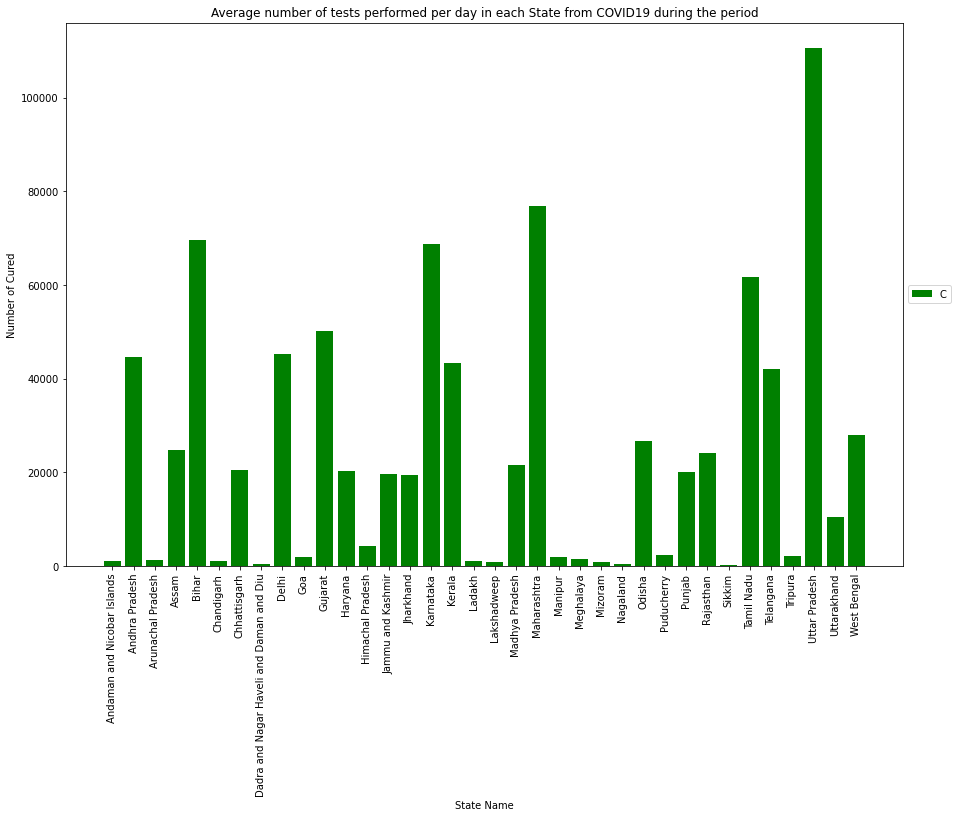

In [ ]:
x = statsSummary_ds2['State']
y = statsSummary_ds2['Mean Samples tested within the period']
plt.figure(figsize=(15, 10))
plt.bar(x,y, color = 'green')
plt.title('Average number of tests performed per day in each State from COVID19 during the period')
plt.xticks(rotation=90)
plt.xlabel('State Name')
plt.ylabel('Number of Cured')
plt.legend('Cured',loc='center left', bbox_to_anchor=(1, 0.5))
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.savefig('/content/drive/MyDrive/Intro to DS/Avg_tested.png')

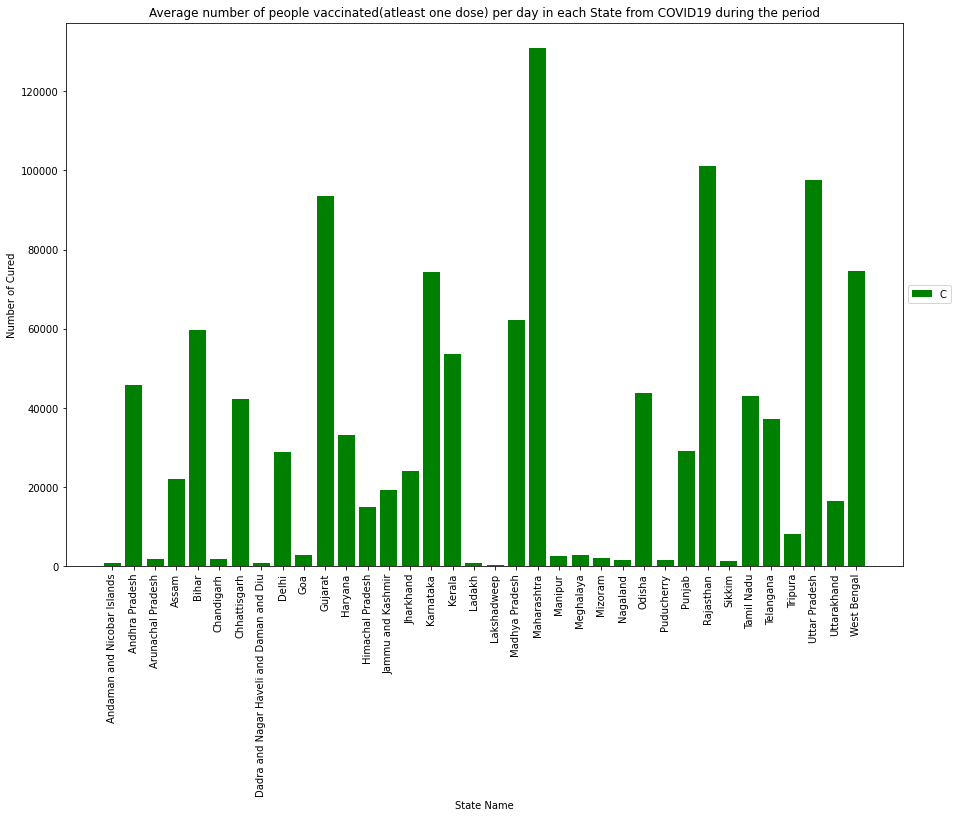

In [ ]:
x = statsSummary_ds3[statsSummary_ds3['State'] !='India']['State']
y = statsSummary_ds3[statsSummary_ds3['State'] !='India']['Mean Total Individuals Vaccinated within the period']
plt.figure(figsize=(15, 10))
plt.bar(x,y, color = 'green')
plt.title('Average number of people vaccinated(atleast one dose) per day in each State from COVID19 during the period')
plt.xticks(rotation=90)
plt.xlabel('State Name')
plt.ylabel('Number of Cured')
plt.legend('Cured',loc='center left', bbox_to_anchor=(1, 0.5))
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.savefig('/content/drive/MyDrive/Intro to DS/Avg_vaccinated.png')

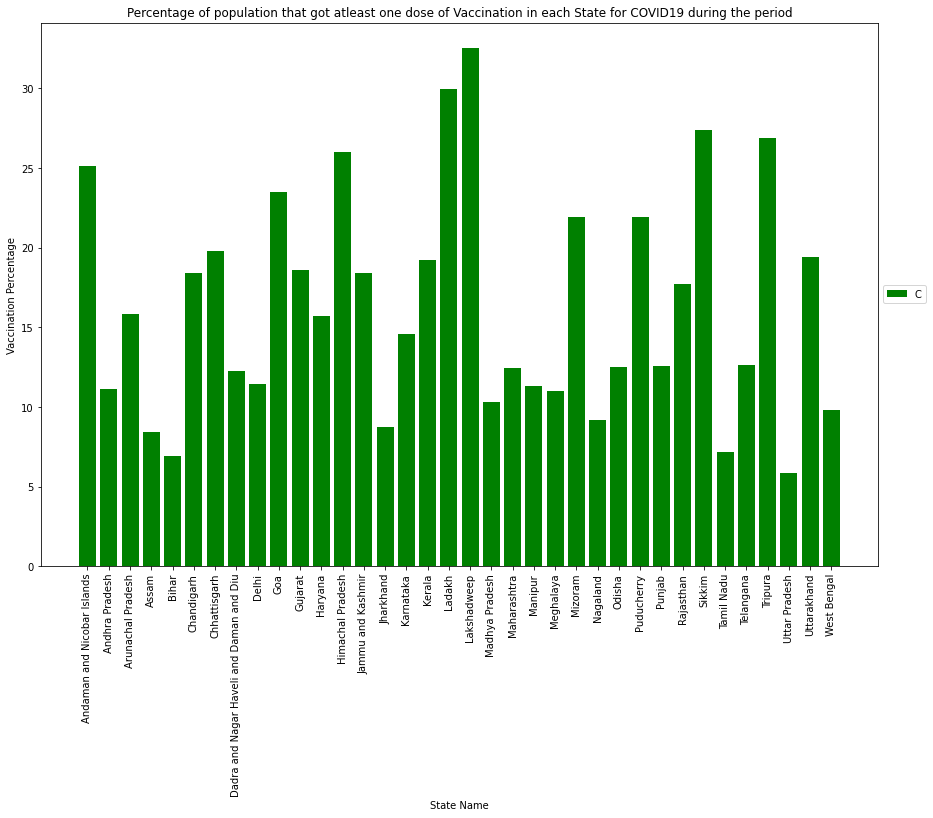

In [ ]:
x = stats['State']
y = stats['Percentage of People vaccinated']
plt.figure(figsize=(15, 10))
plt.bar(x,y, color = 'green')
plt.title('Percentage of population that got atleast one dose of Vaccination in each State for COVID19 during the period')
plt.xticks(rotation=90)
plt.xlabel('State Name')
plt.ylabel('Vaccination Percentage')
plt.legend('Cured',loc='center left', bbox_to_anchor=(1, 0.5))
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.savefig('/content/drive/MyDrive/Intro to DS/percnt_vaccinated_df.png')

In [ ]:
stats = []
vaccData = covid19_vaccination_India[covid19_vaccination_India['State'] !='India']
population = {'Andaman and Nicobar Islands':	398774,'Uttar Pradesh':199812341,'Maharashta':112372972,'Bihar':103804637,
              'West Bengal':91347736,'Madhya Pradesh':72597565,'Tamil Nadu':72138958,'Rajasthan':68621012,'Karnataka':61130704,
              'Gujarat':60383628,'Andhra Pradesh':49386799,'Odisha':41947358,'Telangana':35286757,'Kerala':33387677,'Jharkhand':32966238,
              'Assam':31169272,'Punjab':27704236,'Chhattisgarh':25540196,'Haryana':25353081,'Jammu and Kashmir':12548926,
              'Uttarakhand':10116752,'Himachal Pradesh':6864602,'Tripura':3671032,'Meghalaya':2964007,'Manipur':2721756,'Nagaland':1980602,
              'Goa':1457723,'Arunachal Pradesh':1382611,'Mizoram':1091014,'Sikkim':607688,'Chandigarh':1148000,'Delhi':30291000,'Ladakh':289023,
              'Lakshadweep':65998,'Maharashtra':126189673,'Puducherry':836000,'Dadra and Nagar Haveli and Daman and Diu':670988	}
stats = pd.DataFrame(stats,columns=['State','Percentage of People vaccinated'])
for state in np.unique(statsSummary_ds3[statsSummary_ds3['State'] !='India']['State']):
  entry = [state]
  vaccAdmins = int(covid19_vaccination_India[covid19_vaccination_India['State'] == state]['First Dose Administered'].max())
  entry.append(int((vaccAdmins/population[state]*100)))
  stats.loc[len(stats)] = entry


stats

,State,Percentage of People vaccinated
0,Andaman and Nicobar Islands,25
1,Andhra Pradesh,11
2,Arunachal Pradesh,15
3,Assam,8
4,Bihar,6
5,Chandigarh,18
6,Chhattisgarh,19
7,Dadra and Nagar Haveli and Daman and Diu,12
8,Delhi,11
9,Goa,23


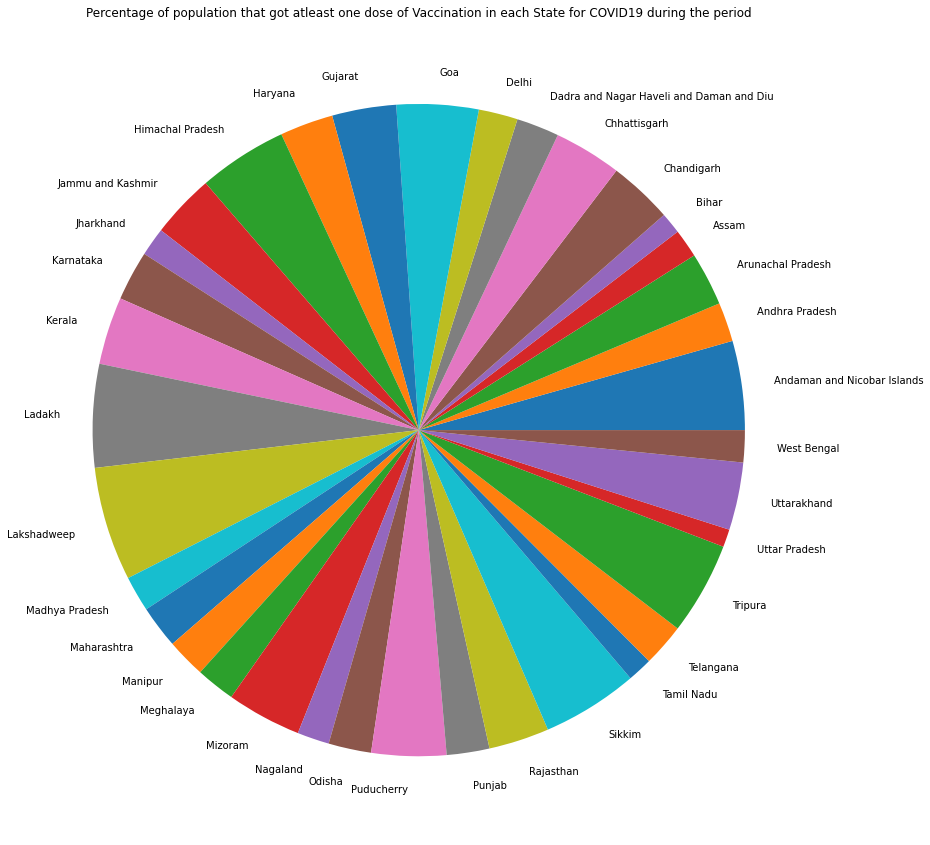

In [ ]:
x = stats['State']
y = stats['Percentage of People vaccinated']
plt.figure(figsize=(15, 15))
plt.pie(y,labels = x)
plt.title('Percentage of population that got atleast one dose of Vaccination in each State for COVID19 during the period')
"""plt.xticks(rotation=90)
plt.xlabel('State Name')
plt.ylabel('Percentage')
plt.legend('Cured',loc='center left', bbox_to_anchor=(1, 0.5))
plt.ticklabel_format(useOffset=False, style='plain', axis='y')"""
plt.savefig('/content/drive/MyDrive/Intro to DS/percntPop_vaccinated.png')

In [ ]:
import weasyprint as wsp
import PIL as pil


def trim(source_filepath, target_filepath=None, background=None):
    if not target_filepath:
        target_filepath = source_filepath
    img = pil.Image.open(source_filepath)
    if background is None:
        background = img.getpixel((0, 0))
    border = pil.Image.new(img.mode, img.size, background)
    diff = pil.ImageChops.difference(img, border)
    bbox = diff.getbbox()
    img = img.crop(bbox) if bbox else img
    img.save(target_filepath)


img_filepath = '/content/drive/MyDrive/Intro to DS/vaccVScases.png'
css = wsp.CSS(string='''
@page { size: 2048px 2048px; padding: 0px; margin: 0px; }
table, td, tr, th { border: 1px solid black; }
td, th { padding: 4px 8px; }
''')
html = wsp.HTML(string=stats.to_html())
html.write_png(img_filepath, stylesheets=[css])
trim(img_filepath)


In [ ]:
statsSummary_ds1 = statsSummary_ds1.drop([5,9,35])
statsSummary_ds1 = statsSummary_ds1.reset_index(drop=True)

In [ ]:
statsSummary_ds2

,State,Mean Samples tested within the period,Mean Positive cases reported within the period,Mean Negative cases reported within the period
0,Andaman and Nicobar Islands,1032,4,18
1,Andhra Pradesh,44586,41071,588
2,Arunachal Pradesh,1284,1197,7
3,Assam,24736,466,231
4,Bihar,69518,6,226
5,Chandigarh,1166,1024,6
6,Chhattisgarh,20553,336,50
7,Dadra and Nagar Haveli and Daman and Diu,426,405,19
8,Delhi,45334,100,378
9,Goa,1902,292,32


In [ ]:
stats['Average number of positive cases reporting per day'] = statsSummary_ds2['Mean Confirmed cases within the period']

In [ ]:
import weasyprint as wsp
import PIL as pil


def trim(source_filepath, target_filepath=None, background=None):
    if not target_filepath:
        target_filepath = source_filepath
    img = pil.Image.open(source_filepath)
    if background is None:
        background = img.getpixel((0, 0))
    border = pil.Image.new(img.mode, img.size, background)
    diff = pil.ImageChops.difference(img, border)
    bbox = diff.getbbox()
    img = img.crop(bbox) if bbox else img
    img.save(target_filepath)


img_filepath = '/content/drive/MyDrive/Intro to DS/percvaccVSconficases.png'
css = wsp.CSS(string='''
@page { size: 2048px 2048px; padding: 0px; margin: 0px; }
table, td, tr, th { border: 1px solid black; }
td, th { padding: 4px 8px; }
''')
html = wsp.HTML(string=stats.to_html())
html.write_png(img_filepath, stylesheets=[css])
trim(img_filepath)


In [ ]:
covid19_testing_India.isna()

,Date,State,TotalSamples,Negative,Positive
0,False,False,False,False,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
13295,False,False,False,True,True
13296,False,False,False,True,True
13297,False,False,False,True,True
13298,False,False,False,True,True


In [ ]:
!git init
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/PersistingSoulV/COVID19-INDIA-Exploratory-Analysis.git
!git push -u origin main


Initialized empty Git repository in /content/.git/
fatal: pathspec 'README.md' did not match any files

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@987363163d6f.(none)')
error: refname refs/heads/master not found
fatal: Branch rename failed
error: src refspec main does not match any.
error: failed to push some refs to 'https://github.com/PersistingSoulV/COVID19-INDIA-Exploratory-Analysis.git'


In [ ]:
import scipy.stats as stats

In [ ]:
#Poisson Distribution
stats.poisson.rvs(2,size=100)

array([0, 2, 0, 0, 1, 2, 2, 1, 1, 5, 2, 1, 1, 2, 2, 0, 1, 1, 0, 2, 3, 2,
       2, 4, 4, 3, 1, 2, 2, 2, 1, 1, 1, 2, 3, 2, 1, 3, 1, 3, 1, 4, 1, 5,
       1, 2, 2, 4, 3, 2, 1, 3, 1, 2, 4, 4, 2, 3, 2, 3, 1, 1, 3, 1, 2, 3,
       1, 1, 1, 1, 2, 2, 1, 3, 3, 2, 0, 2, 5, 1, 3, 3, 0, 3, 2, 1, 4, 3,
       3, 1, 2, 1, 1, 1, 3, 0, 0, 1, 4, 0])

In [ ]:
#Exponential Distribution
stats.expon.rvs(scale=1/0.2,size=100)

array([11.0604328 , 10.83236666,  4.11625513,  7.85774913,  1.89686783,
        0.17055698,  1.81945085,  0.24775283,  7.84630578,  5.66123937,
        4.91225807,  1.12827734,  2.10995075,  4.04357834,  4.79672   ,
        0.07610376,  3.60607725,  4.16673222,  0.61085519,  5.81281118,
        5.82749064,  4.87201597, 15.27329264,  4.51249619,  2.10462676,
        1.24063159,  0.28414094,  0.96939706,  0.28959624,  3.6838072 ,
        0.40128965,  3.4354369 ,  2.49201655, 12.55654159,  3.00338474,
        2.07496986, 10.80397592,  9.85892391,  2.89755269,  1.09415756,
        0.73157268, 23.5001201 ,  7.11164933,  1.81783244,  0.51148857,
        0.28922951,  3.58650235,  0.44696724, 11.06236396,  5.77355105,
        5.03805529,  0.79485483, 23.57245112,  8.5213298 ,  5.66859921,
       11.03369329, 18.8089296 , 25.39511633,  5.21714605,  1.53163774,
        4.25564528,  6.77293208,  4.36994939,  5.61942587,  2.79554873,
        9.78423308,  0.51017084,  2.41847749,  2.30381796,  3.85